c:\Users\COMPUTER\anaconda3\envs\tf2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.13.0
Model: "mlp__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  100480    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2527 - accuracy: 0.9278
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - lo

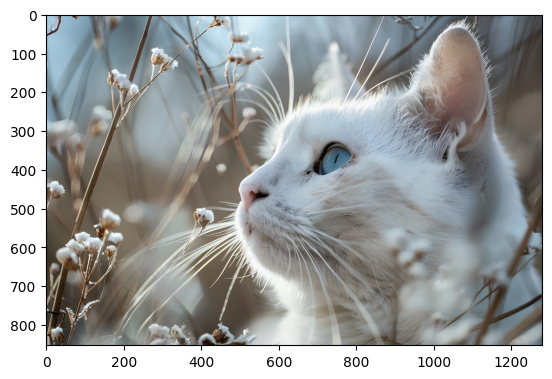

Egyptian_cat (70.9%)


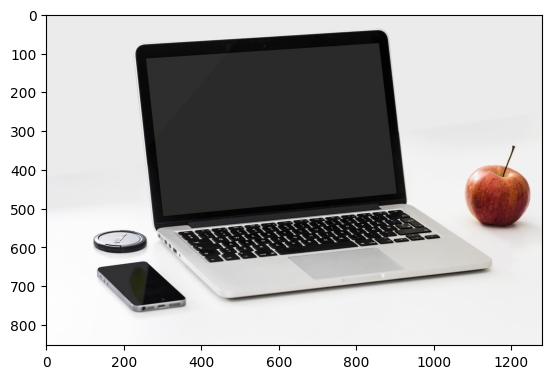

notebook (50.1%)


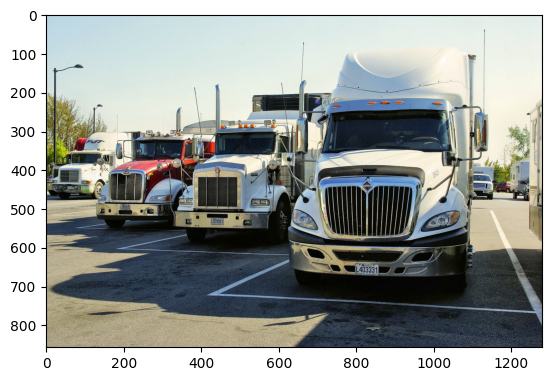

recreational_vehicle (38.1%)


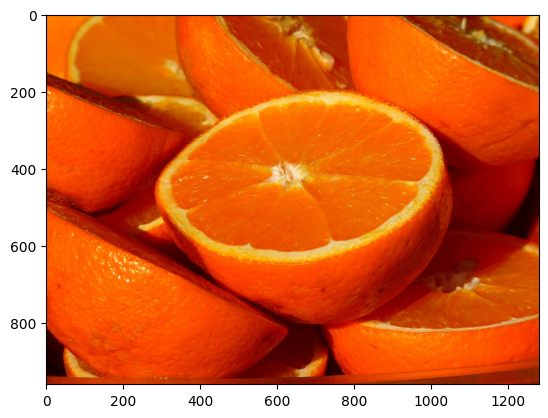

orange (98.5%)


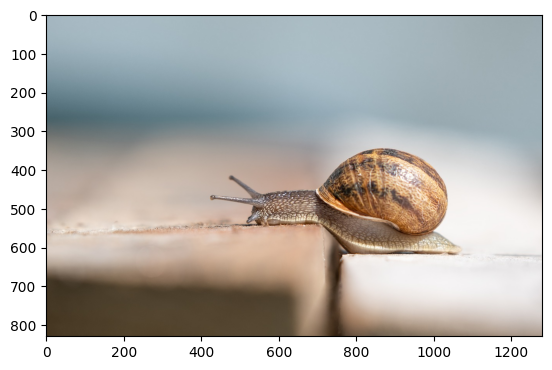

snail (45.8%)
Epoch 1/5
32/32 [==============================] - 18s 481ms/step - loss: 5.5815 - accuracy: 0.0000e+00
Epoch 2/5
32/32 [==============================] - 15s 459ms/step - loss: 5.5815 - accuracy: 0.0000e+00
Epoch 3/5
32/32 [==============================] - 15s 457ms/step - loss: 5.5815 - accuracy: 0.0000e+00
Epoch 4/5
32/32 [==============================] - 15s 456ms/step - loss: 5.5815 - accuracy: 0.0000e+00
Epoch 5/5
32/32 [==============================] - 15s 456ms/step - loss: 5.5815 - accuracy: 0.0000e+00
7/7 - 4s - loss: 5.8358 - accuracy: 0.0000e+00 - 4s/epoch - 526ms/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2590 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1144 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0797 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp4f6qrj6j\assets


INFO:tensorflow:Assets written to: D:/mlp_model/mlp_model\assets


INFO:tensorflow:Assets written to: D:/mlp_model/mlp_model\assets


tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 3], shape=(2,), dtype=int32)
tf.Tensor(
[[4. 3.]
 [2. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 3], shape=(2,), dtype=int32)
tf.Tensor(
[[4. 3.]
 [2. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor([[2. 3. 4.]], shape=(1, 3), dtype=float32)


AttributeError: 'function' object has no attribute 'get_concrete_function'

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import tensorflow_hub as hub

# 1. TensorFlow 버전 확인
print(tf.__version__)

# 2. CPU 물리적 장치 목록 확인
tf.config.list_physical_devices('CPU')

# 3. MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 4. 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 5. 다층 퍼셉트론 모델 정의
class MLP_Model(tf.keras.Model):
    def __init__(self):
        super(MLP_Model, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(128, activation='relu')
        self.softmax = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense(x)
        return self.softmax(x)

# MLP 모델 인스턴스 생성
mlp_model = MLP_Model()
mlp_model.build((None, 28, 28))  # MNIST 데이터셋의 입력 형태

# 6. 모델 컴파일
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 7. 모델 요약 출력
mlp_model.summary()

# 8. 모델 훈련
mlp_model.fit(x_train, y_train, epochs=5)

# 9. 테스트 데이터 평가
mlp_model.evaluate(x_test, y_test, verbose=2)

# 12. CNN 모델 정의
x_train_4d = x_train.reshape(-1, 28, 28, 1)
x_test_4d = x_test.reshape(-1, 28, 28, 1)

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
cnn_model.fit(x_train_4d, y_train, epochs=5)
cnn_model.evaluate(x_test_4d, y_test, verbose=2)

# 13. 이미지 데이터 전처리 및 리사이징
data_dir = "D:/imagefiles"
files = os.listdir(data_dir)

images = []
for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

# 14. 이미지 리사이징 및 전처리
resized_images = np.array([tf.image.resize(image, [224, 224]) for image in images])
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

# 15. MobileNetV2 모델 로드 및 예측
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")
y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top=topK)

# 16. 예측 결과 출력
for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()
    for k in range(topK):
        print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2] * 100, 1)}%)')

# 17. cats_vs_dogs 데이터셋 로드
tfds.disable_progress_bar()
raw_train, raw_test = tfds.load(
    'cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], 
    as_supervised=True
)

# 18. 데이터 전처리
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # 이미지 타입을 float32로 변환
    out_image = tf.image.resize(image, [224, 224])
    return out_image, label

# 데이터셋 샘플링 및 캐싱
batch_size = 32
train_subset = raw_train.take(1000)
test_subset = raw_test.take(200)

train_batch = train_subset.map(preprocess).cache().prefetch(tf.data.AUTOTUNE).batch(batch_size)
test_batch = test_subset.map(preprocess).cache().prefetch(tf.data.AUTOTUNE).batch(batch_size)

# 19. TensorFlow Hub 모델 로드
hub_model_transfer = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")
])
hub_model_transfer.build([None, 224, 224, 3])

# 20. 모델 컴파일 및 훈련
hub_model_transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hub_model_transfer.fit(train_batch, epochs=5)

# 21. 모델 평가
hub_model_transfer.evaluate(test_batch, verbose=2)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

mlp_model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(128, activation ='relu'),
     tf.keras.layers.Dense(10, activation ='softmax')
])

mlp_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
mlp_model.fit(x_train, y_train, epochs=5)

# 24. TensorFlow Lite 모델 변환
converter = tf.lite.TFLiteConverter.from_keras_model(mlp_model)
tflite_model = converter.convert()

# 22. MLP 모델 저장
mlp_model.save("D:/mlp_model/mlp_model")

# 23. 저장된 모델 로드
h5_model = tf.keras.models.load_model("D:/mlp_model/mlp_model")

# 26. Custom Layer 정의
class Inc(tf.keras.layers.Layer):
    def call(self, inputs):
        return inputs + 1

inc = Inc()

# 27. Graph 정의
class Inc_Graph(tf.keras.layers.Layer):
    @tf.function
    def call(self, inputs):
        return inputs + 1

inc_g = Inc_Graph()

# 28. Function 정의
inc_g2 = tf.function(inc)

# 29. 함수 호출 및 결과 출력
print(inc_g(tf.constant(3)))
print(inc_g(tf.constant([3, 2])))
print(inc_g(tf.constant([[3, 2], [1.0, 5.0]])))
print(inc_g2(tf.constant(3)))
print(inc_g2(tf.constant([3, 2])))
print(inc_g2(tf.constant([[3, 2], [1.0, 5.0]])))

# 30. 추가 결과 출력
print(inc_g(tf.constant(4)))
print(inc_g2(tf.constant(4)))

# 31. Concrete Function 정의
concrete_fun = inc_g.call.get_concrete_function(tf.TensorSpec(shape=(1, 3), dtype=tf.float32))
print(concrete_fun(tf.constant([[1.0, 2.0, 3.0]])))

# 32. MLP 모델을 TensorFlow Function으로 변환
concrete_fun = tf.constant(np.random.rand(1, 28, 28), dtype=tf.float32)  # 샘플 입력
mlp_model(sample_input)  # 모델 호출하여 빌드

# Concrete function 얻기
concrete_func = mlp_model.call.get_concrete_function(sample_input)
